# A Gentle Introduction to PyTorch

In our previous PyTorch [notebook](https://medium.com/dair-ai/pytorch-1-2-quickstart-with-google-colab-6690a30c38d), we learned about how to get started quickly with PyTorch using Google Colab. In this tutorial, we are going to take a step back and review some of the basic components of building a deep learning model using PyTorch. 

This will be a brief tutorial and will avoid using jargon and overcomplicated code. That said, this is perhaps the most basic of models you can build with PyTorch. 

If fact, it is so basic that it's ideal for those starting to learn about PyTorch and deep learning. So if you have a friend or colleague that wants to jump in, I highly encourage you to refer them to this tutorial as a starting point. Let's get started!


**Author:** [Elvis Saravia](https://twitter.com/omarsar0)

**Complete Code Walkthrough:** [Blog post](https://medium.com/dair-ai/pytorch-1-2-introduction-guide-f6fa9bb7597c)

---

## Getting Started

We need to import a few modules which will be useful to obtain the necessary functions that will help us to build our deep learning model. The main ones are `torch` and `torchvision`. They contain the majority of the functions that you need to get started with PyTorch. However, as this is a deep learning tutorial we will need `torch.nn`, `torch.nn.functional` and `torchvision.transforms` which all contain utility functions to build our model. We probably won't use all the modules listed below but they are the typical modules you will be importing when starting your deep learning projects.  

In [63]:
## The usual imports
import torch    # Torch 是一个经典的对多维矩阵数据进行操作的张量（tensor ）库，在机器学习和其他数学密集型应用有广泛应用。它提供了张量（tensor）操作和计算图构建的功能；提供了自动求导（Autograd）功能，使得用户可以轻松地构建和训练神经网络模型。
import torch.nn as nn   # 导入torch.nn并通过nn来引用  Neural Network:神经网络
import torch.nn.functional as F # 导入torch.nn 的 函数库 并通过F来引用
import torchvision      # Torchvision 主要用于计算机视觉任务，包括图像处理、数据加载、数据增强、预训练模型等。Torchvision 提供了各种经典的计算机视觉数据集的加载器，以及用于数据预处理和数据增强的工具，可以帮助用户更轻松地进行图像分类、目标检测、图像分割等任务。
import torchvision.transforms as transforms # torchvision.transforms 用于对图像进行各种变换

## for printing image
import matplotlib.pyplot as plt # 绘图
import numpy as np  # 处理数组和矩阵

## Loading the Data
Let's get right into it! As with any machine learning project, you need to load your dataset. We are using the [MNIST dataset](http://yann.lecun.com/exdb/mnist/), which is the Hello World of datasets in the machine learning world. 

The data consists of number images that are of size `28 X 28`. We will discuss the images shortly, but our plan is to load data into batches of size `32`, similar to the figure below.


![alt text](https://drive.google.com/uc?export=view&id=19AC_WpscyXkrK_o4PaFFGpt_jG0aJm_f)  
![alt text](pytorch_gentle_intro_01.png)


Here are the complete steps we are performing when importing our data:
- We will import and tranform the data into tensors using the `transforms` module
- We will use `DataLoader` to build convenient data loaders, which makes it easy to efficiently feed data in batches to deep learning models. We will get to the topic of batches in a bit but for now just think of them as subsets of your data. 
- As hinted above, we will also create batches of the data by setting the `batch` parameter inside the data loader. Notice we use batches of `32` in this tutorial but you can change it to `64` if you like. 

In [64]:
## parameter denoting the batch size
BATCH_SIZE = 32 # 每批图片的张数

## transformations
# transforms.Compose 用于创建一个包含多个数据变换操作的变换对象。
transform = transforms.Compose(     # 使用 transforms 模块将图片数据转换成张量数据
    [transforms.ToTensor()])    # 转化为张量

# MNIST数据集来自美国国家标准与技术研究所, National Institute of Standards and Technology (NIST)。训练集（training set）由来自250个不同人手写的数字构成，其中50%是高中学生，50%来自人口普查局（the Census Bureau）的工作人员。测试集（test set）也是同样比例的手写数字数据，但保证了测试集和训练集的作者集不相交。
## download and load training dataset
# train=True：读入的数据作为训练集（如果为true则从training.pt创建数据集，否则从test.pt创建数据集）
# transform则是读入我们自己定义的数据预处理操作。接收PIL图片并返回转换后版本图片的转换函数
# download=True则是当我们的根目录（root）下没有数据集时，便自动下载。
trainset = torchvision.datasets.MNIST(root='./data', train=True,                # 下载训练数据集
                                        download=True, transform=transform) 
# `trainloader` is what holds the data loader object which takes care of shuffling the data and constructing the batches.
# shuffle (bool, optional)：是否打乱数据，一般在训练数据中会采用
# num_workers：这个参数必须大于等于0，为0时默认使用主线程读取数据，其他大于0的数表示通过多个进程来读取数据，可以加快数据读取速度，一般设置为2的N次方，且小于batch_size（默认：0）
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,      # 加载训练数据集
                                          shuffle=True, num_workers=2)

## download and load testing dataset
testset = torchvision.datasets.MNIST(root='./data', train=False,                # 下载测试数据集
                                       download=True, transform=transform)      
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,        # 加载测试数据集
                                         shuffle=False, num_workers=2)

Let's inspect what the trainset and testset objects contain. 

In [65]:
## print the trainset and testset
print(trainset) # 打印训练集
print(testset)  # 打印测试集

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


This is a beginner's tutorial so I will break down things a bit here:
- `BATCH_SIZE` is a parameter that denotes the batch size we will use for our model
- `transform` holds code for whatever transformations you will apply to your data. I will show you an example below to demonstrate exactly what it does to shed more light into its use
- `trainset` and `testset` contain the actual dataset object. Notice I use `train=True` to specify that this corresponds to the training dataset, and I use `train=False` to specify that this is the remainder of the dataset which we call the testset. From the portion I printed above you can see that the split of the data was 85% (60000) / 15% (10000), corresponding to the portions of samples for training set and testing set, respectively. 
- `trainloader` is what holds the data loader object which takes care of shuffling the data and constructing the batches.

Now let's look at that `transforms.Compose(...)` function and see what it does. We will use a randomized image to demonstrate its use. Let's generate an image. 

In [66]:
# 它可以将以 [c,h,w] 形式组织的 Tensor  和以 [h,w,c] 形式组织的 numpy ndarray 转换为 PIL.Image .
image = transforms.ToPILImage(mode='L')(torch.randn(1, 96, 96)) # 将tensor转换为PIL格式图片

**And** let's render it:

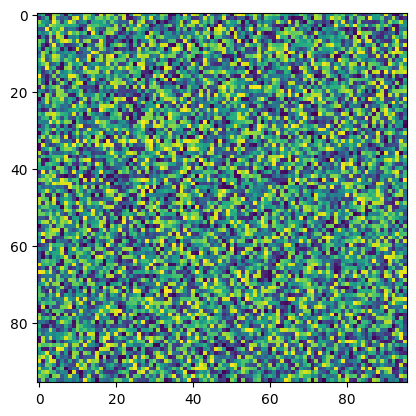

In [67]:
plt.imshow(image)   # 显示图片

Okay, we have our image sample. And now let's apply some dummy transformation to it. We are going to rotate the image by `45` degrees. The transformation below takes care of that:

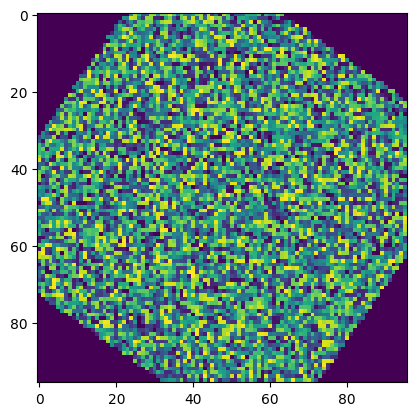

In [68]:
## dummy transformation
dummy_transform = transforms.Compose(   # transforms.Compose 用于创建一个包含多个数据变换操作的变换对象。
    [transforms.RandomRotation(45)])    # 图片旋转45°，顺时针

dummy_result = dummy_transform(image)   # 执行transform

plt.imshow(dummy_result)    # 显示图片

Notice you can put the transformations within `transforms.Compose(...)`. You can use the built in transformations offered by PyTorch or you can build your own and compose as you wish. In fact, you can place as many transformation as you wish in there. Let's try another composition of transformations: rotate + vertical flip. 

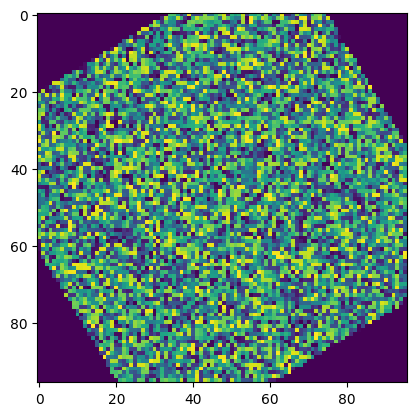

In [69]:
## dummy transform 
dummy2_transform = transforms.Compose(
    [transforms.RandomRotation(45), transforms.RandomVerticalFlip()])   # 图片顺时针旋转45°；根据概率对图片进行垂直（上下）翻转，每次根据概率来决定是否执行翻转；

dummy2_result = dummy2_transform(image) # 执行transform

plt.imshow(dummy2_result)   # 显示图片

That's pretty cool right! Keep trying other transform methods. On the topic of exploring our data further, let's take a look at our images dataset. 

## Exploring the Data
As a practioner and researcher, I am always spend a bit of time and effort exploring and understanding my datasets. It's fun and this is a good practise to ensure that everything is in order.

Let's check what the train and test dataset contain. I will use matplotlib to print out some of the images from our dataset. With a bit of numpy I can convert images into numpy and print them out. Below I print out an entire batch. 

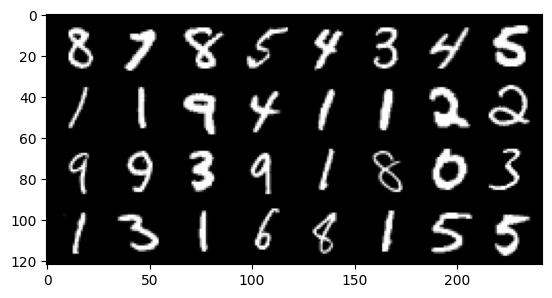

In [82]:
## functions to show an image
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy() # 将数据转换为矩阵数组
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # 调换数组的行列值的索引值， (x, y ,z) -> (y,z,x)

## get some random training images
dataiter = iter(trainloader)    # iter()函数用于将可迭代对象转换为迭代器。
# images, labels = dataiter.next()  # pytorch版本不同导致报错：'_MultiProcessingDataLoaderIter' object has no attribute 'next'
images, labels = next(dataiter) # next()函数用于获取迭代器的下一个元素。

## show images
imshow(torchvision.utils.make_grid(images)) # make_grid用于把几个图像按照网格排列的方式绘制出来

The dimensions of our batches are as follow:

In [83]:
for images, labels in trainloader:
    # 对应上述 The data consists of number images that are of size `28 X 28`. We will discuss the images shortly, but our plan is to load data into batches of size `32`, similar to the figure below.
    print("Image batch dimensions:", images.shape)  # 打印图片的shape,维度 32*1*28*28
    print("Image label dimensions:", labels.shape)  # 打印标记的shape，维度 32
    break

Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimensions: torch.Size([32])


## The Model
Now it's time to build the deep learning model that will be used to perform the image classification. We will keeps things simple and stack a few dense layers and a dropout layer to train our model.  
dense layer:密集层  也被称为全连接层（Fully Connected Layer）或线性层（Linear Layer）。  
dropout layer:用来防止过拟合

Let's discuss a bit about the model:

- First of all the following structure involving a `class` is standard code that's used to build the neural network model in PyTorch:

```python
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        
        # layers go here
    
    def forward(self, x):
        
        # computations go here
```
- The layers are defined inside `def __init__()`. `super(...).__init__()` is just there to stick things together. For our model, we stack a hidden layer (`self.d1`) followed by a dropout layer (`self.dropout`), which is then followed by an output layer (`self.d2`). 
- `nn.Linear(...)` defines the dense layer and it requires the `in` and `out` dimensions, which corresponds to the size of the input feature and output feature of that layer, respectively. 
- `nn.Dropout(...)` is used to define a dropout layer. Dropout is an approach in deep learning that helps a model to avoid overfitting. This means that dropout acts as a regularization technique that helps the model to not overfit on the images it has seen while training. We want this because we need a model that generalizes well to unseen examples -- in our case, the testing dataset. Dropout randomly zeroes some of the units of the neural network layer with probability of `p=0.2`. Read more about the dropout layer [here](https://pytorch.org/docs/stable/nn.html#dropout). 
- The entry point of the model, i.e. where the data enters, is placed under the `forward(...)` function. Typically, we also place other transformations we perform on the data while training inside this function. 
- In the `forward()` function we are performing a series of computations on the input data
    - we flatten the images first, converting it from 2D (`28 X 28`) to 1D (`1 X 784`).
    - then we feed the batches of those 1D images into the first hidden layer
    - the output of that hidden layer is then applied a [non-linear activate function](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) called `ReLU`. It's not so important to know what `F.relu()` does at the moment, but the effect that it achieves is that it allows faster and more effective training of neural architectures on large datasets
    - as explained above, the dropout also helps the model to train more efficiently by avoiding overfitting on the training data
    - we then feed the output of that dropout layer into the output layer (`d2`)
    - the result of that is then fed to the [softmax function](https://en.wikipedia.org/wiki/Softmax_function), which converts or normalized the output into a probability distribution which helps with outputting proper predictions values that are used to calculate the accuracy of the model; this will the final output of the model

In [84]:
## the model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__() # 定义神经网络的层次
        self.d1 = nn.Linear(28 * 28, 128)   # 定义全连接层d1，即上文所说dense layer;输入张量的维度是28*28，输出张量的维度是128
        self.dropout = nn.Dropout(p=0.2)     # 定义dropout层,防止过拟合（avoid overfitting）；表示每个神经元有0.2的可能性不被激活
        self.d2 = nn.Linear(128, 10)    # 定义全连接层d2;输入张量的维度是128，输出张量的维度是10
    
    def forward(self, x):   # 模型的入口，即数据进入的位置；通常，也会在此处进行数据的转换transformations
        # - `start_dim`（可选）：指定开始扁平化的维度。默认值为 1，表示从第二个维度开始扁平化。注意，维度索引是从 0 开始的。
        # - `end_dim`（可选）：指定结束扁平化的维度。默认值为 -1，表示扁平化到最后一个维度。
        x = x.flatten(start_dim = 1)    # 将张量进行扁平化处理：将图片从2维 28*28 转换成 1维 1*784；
        x = self.d1(x)  # 调用全连接层d1
        x = F.relu(x)   # 使用激活函数 ReLU:非线性激活函数；在大数据下更快更有效的训练
        x = self.dropout(x) # 调用dropout层 the dropout also helps the model to train more efficiently by avoiding overfitting on the training data
        logits = self.d2(x) # 调用全连接层d2
        out = F.softmax(logits, dim=1)     # 该函数将输出转换或归一化为概率分布，这有助于输出用于计算模型准确性的正确预测值
        # Softmax函数应用于沿dim的所有切片，并将重新缩放它们，使元素位于[ 0 , 1 ] [0, 1][0,1]的范围内并和为1。
        # input:[Tensor] 输入张量
        # dim:[int] Softmax函数将沿着dim轴计算，即沿dim的每个切片的和为1
        # dtype:[可选, torch.dtype] 想要返回张量的数据类型。如果指定，则在执行操作之前将输入张量强制转换为dtype。这对于防止数据类型溢出非常有用。默认值为None

        return out  # 返回值

Visually, the following is a diagram of the model we have built. Just keep in mind that the hidden layer is much bigger as shown in the diagram but due to space constraint, the diagram is just an approximation to the actual model. 

![alt text](https://drive.google.com/uc?export=view&id=1NuFflDPOW_hIAHTH2pXZAEhSINygPlnB)  
![alt text](pytorch_gentle_intro_02.png)

As I have done in my previous tutorials, I always encourage to test the model with 1 batch to ensure that the output dimensions are what we expect. Notice how we are iterating over the dataloader which conveniently stores the `images` and `labels` pairs. `out` contains the output of the model, which are the logits applied a `softmax` layer which helps with prediction. 

In [85]:
## test the model with 1 batch
model = MyModel()   # 实例化MyModel
for images, labels in trainloader:  # 在数据加载器上进行迭代 . Notice how we are iterating over the dataloader which conveniently stores the `images` and `labels` pairs.
    print("batch size:", images.shape)  # 输出image的维度
    out = model(images) # 传入images数据并执行
    print(out.shape)    # 打印输出的维度，操作后得到10个相关的输出
    break

batch size: torch.Size([32, 1, 28, 28])
torch.Size([32, 10])


We can clearly see that we get back the batches with 10 output values associate with it. These are used to compute the performance of the model. 

## Training the Model
Now we are ready to train the model but before that we are going to setup a loss function(损失函数), an optimizer(优化器) and a function to compute accuracy of the model. 

- The `learning_rate` is the rate at which the model will try to optimize its weights, which is just another parameter for the model. 
- `num_epochs` is the number of training steps. 
- `device` determines what hardware we will use to train the model. If a `gpu` is present, then that will be used, otherwise it defaults to the `cpu`.
- `model` is just the model instance.
- `model.to(device)` is in charge of setting the actaull device that will be used for training the model
- `criterion` is just the metric that's used to compute the loss of the model while it forward and backward trains to optimize its weights. 
- `optimizer` is the optimization technique used to modify the weights in the backward propagation. Notice that it requires the `learning_rate` and the model parameters which are part of the calculation to optimize weights.


In [75]:
learning_rate = 0.001   # 学习率，控制模型的学习进度； 即 stride (步长) ，即反向传播算法中的 η
num_epochs = 5          # 一个Epoch指的是将所有的数据输入网络完成一次向前计算及反向传播。

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # 决定使用什么硬件训练模型；如果cuda可用，则用cuda(GPU),否则默认使用CPU
model = MyModel()                   # 实例化MyModel
model = model.to(device)            # 设置用于训练的设备
criterion = nn.CrossEntropyLoss()   # 用来计算训练中前向和后向传播的损失以优化权重
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  # 调用adam优化算法

The utility function below helps to calculate the accuracy of the model. For now, it's not important to understand how it's calculated but basically it compares the outputs of the model (predictions) with the actual target values (i.e., the labels of the dataset), and tries to compute the average of correct predictions.

In [76]:
## utility function to compute accuracy
def get_accuracy(output, target, batch_size):   # 计算模型的准确率
    ''' Obtain accuracy for training round '''
    # it's not important to understand how it's calculated but basically it compares the outputs of the model (predictions) with the actual target values (i.e., the labels of the dataset)
    corrects = (torch.max(output, 1)[1].view(target.size()).data == target.data).sum()  # 比较训练结果和真实标记一致的数目
    # torch.max(output, 1)[1]： 这里第一个1表示求行的最大值因为每一行代表了一个样本的输出结果，第二个1代表了我们只要索引
    accuracy = 100.0 * corrects/batch_size  # 计算平均的准确率；.item() 将tensor转化为普通的float或者int，
    return accuracy.item()  # 返回准确率

## Training the Model
Now it's time to train the model. The code portion that follows can be descrive in the following steps:

- The first thing in training a neural network model is defining the training loop, which is achieved by:

```python
for epoch in range(num_epochs):
    ...
```

- We define two variables, `training_running_loss` and `train_acc` that will help us to monitor the running accuracy and loss of the modes while it trains over the different batches.
- `model.train()` explicitly indicates that we are ready to start training. 
- Notice how we are iterating over the dataloader, which conveniently gives us the batches in image-label pairs. 
- That second `for` loop means that for every training step we will iterate over all the batches and train the model over them.
- We feed the model the images via `model(images)` and the output are the predictions of the model. 
- The predictions together with the target labels are used to compute the loss using the loss function we defined earlier.
- Before we update our weights for the next round of training, we perform the following steps:
    - we use the optimizer object to reset all the gradients for the variables it will update. This is a safe step and it doesn't overwrites the gradients the model accumulates while training (those are stored in a buffer [link text](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#pytorch-optim) via the `loss.backward() call)
    - `loss.backward()` simply computes the gradient of the loss w.r.t to the model parameters
    - `optimizer.step()` then ensures that the model parameters are updated

- Then we gather and accumulate the loss and accuracy, which is what we will use to tell us if the model is learning properly

In [77]:
## train the model
for epoch in range(num_epochs): # 训练神经网络模型  num_epochs = 5 
    train_running_loss = 0.0    # 损失
    train_acc = 0.0             # 准确率

    ## commence training
    model = model.train()       # 将模型设置为训练模式

    ## training step
    for i, (images, labels) in enumerate(trainloader):  # 迭代并读取图片和标记数据，每个 epoch 都会迭代所有训练数据集并在其上训练模型
        
        images = images.to(device)  # 将图片数据加载到 上文设置的 device 中
        labels = labels.to(device)  # 将标记数据加载到 上文设置的 device 中

        ## forward + backprop + loss
        predictions = model(images)  # 将图片数据传入模型进行预测，将模型的输出保存到predictions变量中
        loss = criterion(predictions, labels)   # criterion = nn.CrossEntropyLoss()   # 用来计算训练中前向和后向传播的损失以优化权重 
        optimizer.zero_grad()   # 将梯度归零 reset all the gradients for the variables，it doesn't overwrites the gradients the model accumulates while training
        loss.backward()         # 反向传播计算得到每个参数的梯度值 computes the gradient of the loss

        ## update model params
        optimizer.step()        # 通过梯度下降执行参数更新 ensures that the model parameters are updated

        train_running_loss += loss.detach().item()     # 累加训练中的损失 使用loss.detach()来获取不需要梯度回传的部分。使用item()直接获得对应的python数据类型。
        train_acc += get_accuracy(predictions, labels, BATCH_SIZE)  # 通过定义的函数计算准确率
    
    model.eval()    # 设置模型为评估模式
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch, train_running_loss / i, train_acc/i))    # 打印epoch的序号；平均loss;平均准确率

Epoch: 0 | Loss: 1.5941 | Train Accuracy: 88.91
Epoch: 1 | Loss: 1.5301 | Train Accuracy: 93.81
Epoch: 2 | Loss: 1.5148 | Train Accuracy: 95.22
Epoch: 3 | Loss: 1.5062 | Train Accuracy: 95.99
Epoch: 4 | Loss: 1.5006 | Train Accuracy: 96.52


After all the training steps are over, we can clearly see that the loss keeps decreasing while the training accuracy of the model keeps rising, which is a good sign that the model is effectively learning to classify images.

We can verify that by computing the accuracy on the testing dataset to see how well the model performs on the image classificaiton task. As you can see below, our basic CNN model is performing very well on the MNIST classification task.

In [78]:
test_acc = 0.0
for i, (images, labels) in enumerate(testloader, 0):    # 迭代测试数据集
    images = images.to(device)      # 将图片数据加载到 上文设置的 device 中
    labels = labels.to(device)      # 将标记数据加载到 上文设置的 device 中
    outputs = model(images)         # 将图片数据传入模型进行预测
    test_acc += get_accuracy(outputs, labels, BATCH_SIZE)   # 通过定义的函数计算准确率
        
print('Test Accuracy: %.2f'%( test_acc/i))  # 输出平均的准确率

Test Accuracy: 96.83


## Final Words

Congratulation! You have made it to the end of this tutorial. This is a really long tutorial that aims to give an very basic introduction to the fundamentals of image classification using neural networks and PyTorch.

*This tutorial was heavily inspired by this [TensorFlow tutorial.](https://www.tensorflow.org/beta/tutorials/quickstart/beginner) We thank the authors of the corresponding reference for their valuable work.*

## References
- [PyTorch 1.2 Quickstart with Google Colab](https://medium.com/dair-ai/pytorch-1-2-quickstart-with-google-colab-6690a30c38d)
- [Get started with TensorFlow 2.0 for beginners](https://www.tensorflow.org/beta/tutorials/quickstart/beginner)
- [PyTorch Data Loading Tutorial](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)
-[ Neural Networks with PyTorch](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py)